In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

experiment = "1024PC"
log_file_path = "../logs/1024PC/1024PC-2025-03-12-07-03-06--memory.log"

columns = ["timestamp", "uid", "pid", "minflt/s", "majflt/s", "vsz", "rss", "%mem", "command"]
data = []

# Parse the log file
with open(log_file_path, 'r') as file:
    header_found = False
    for line in file:
        # Ignore lines before the header
        if not header_found:
            if line.strip().startswith("Timestamp,UID,PID,minflt/s,majflt/s,VSZ,RSS,%MEM,Command"):
                header_found = True
            continue

        # Parse the log data after the header
        parts = line.split(",")
        if len(parts) < 9:  # Skip lines that don't have enough columns
            continue
        timestamp = parts[0]
        uid = int(parts[1])
        pid = int(parts[2])
        minflt_s = float(parts[3]) if parts[3] else None
        majflt_s = float(parts[4]) if parts[4] else None
        vsz = float(parts[5]) if parts[5] else None
        rss = float(parts[6]) if parts[6] else None
        p_mem = float(parts[7]) if parts[7] else None
        command = parts[8].strip()
        data.append([timestamp, uid, pid, minflt_s, majflt_s, vsz, rss, p_mem, command])

df = pd.DataFrame(data, columns=columns)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Compute time since start in hours (as float)
start_time = df.index[0]
df['hours_since_start'] = (df.index - start_time).total_seconds() / 3600
df.set_index('hours_since_start', inplace=True)

df['RSS (GB)'] = df['rss'] / (1024 * 1024)
df['VSZ (GB)'] = df['vsz'] / (1024 * 1024)

# print(df.head())

print("📊 " + experiment + " RSS:")
print(f"    Min: {df['RSS (GB)'].min()} GB")
print(f"    Max: {df['RSS (GB)'].max()} GB")
print(f"    Mean: {df['RSS (GB)'].mean()} GB")

print("📊 " + experiment + " VSZ:")
print(f"    Min: {df['VSZ (GB)'].min()} GB")
print(f"    Max: {df['VSZ (GB)'].max()} GB")
print(f"    Mean: {df['VSZ (GB)'].mean()} GB")

print("📊 " + experiment + " majflt/s:")
print(f"    Min: {df['majflt/s'].min()} GB")
print(f"    Max: {df['majflt/s'].max()} GB")
print(f"    Mean: {df['majflt/s'].mean()} GB")

print("📊 " + experiment + " minflt/s:")
print(f"    Min: {df['minflt/s'].min()} GB")
print(f"    Max: {df['minflt/s'].max()} GB")
print(f"    Mean: {df['minflt/s'].mean()} GB")

📊 1024PC RSS:
    Min: 0.0166015625 GB
    Max: 619.6312980651855 GB
    Mean: 501.67310991646843 GB
📊 1024PC VSZ:
    Min: 0.10074996948242188 GB
    Max: 804.7165260314941 GB
    Mean: 656.8318149331349 GB
📊 1024PC majflt/s:
    Min: 0.0 GB
    Max: 2128180.0 GB
    Mean: 1892.0327457643118 GB
📊 1024PC minflt/s:
    Min: 0.0 GB
    Max: 3667364.0 GB
    Mean: 95719.94479352495 GB


In [ ]:

# Create subplots with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for memory usage
fig.add_trace(
    go.Scatter(x=df.index, y=df['RSS (GB)'], name="RSS (GB)", line=dict(color="blue")),
    secondary_y=False
)
fig.add_trace(
    go.Scatter(x=df.index, y=df['VSZ (GB)'], name="VSZ (GB)", line=dict(color="cyan")),
    secondary_y=False
)

# Add traces for page faults
fig.add_trace(
    go.Scatter(x=df.index, y=df['minflt/s'], name="Minor Page Faults (minflt/s)", line=dict(color="orange", dash="dot")),
    secondary_y=True
)
fig.add_trace(
    go.Scatter(x=df.index, y=df['majflt/s'], name="Major Page Faults (majflt/s)", line=dict(color="red", dash="dot")),
    secondary_y=True
)

# Calculate the average minor page fault
average_minflt_s = df['minflt/s'].mean()
median_minflt_s = df['minflt/s'].median()
print(f"Average minor page fault: {average_minflt_s}")
print(f"Average minor page fault: {median_minflt_s}")

fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=30)
)

fig.update_layout(
    font=dict(
        family="serif",
        size=20
    )
)

# Update layout with axis titles
fig.update_layout(
    legend_title="Metrics",
    template="plotly_white"
)

# Set y-axes titles and scaling
fig.update_yaxes(title_text=None, secondary_y=False)
fig.update_yaxes(title_text=None, secondary_y=True)
fig.update_layout(
    showlegend=False,
    template="simple_white",
    width=800,
    height=400
)

fig.write_image(""+experiment+"_Mem.pdf")
fig.show()

Average minor page fault: 95719.94479352495
Average minor page fault: 75224.0


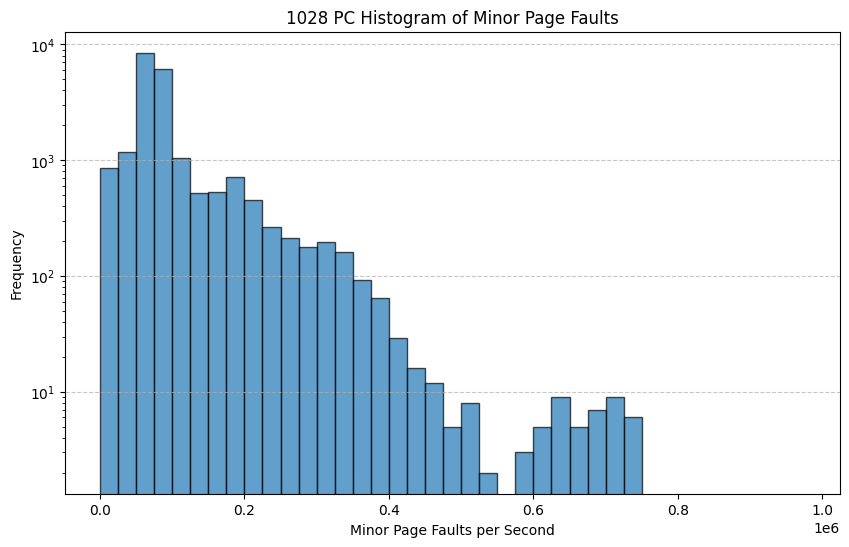

In [8]:
plt.figure(figsize=(10, 6))
# Normalize y-axis
# plt.ylim(0, 20000)
plt.yscale('log')
plt.hist(df['minflt/s'], bins=range(0, 1000000, 25000), edgecolor='black', alpha=0.7)
plt.xlabel('Minor Page Faults per Second')
plt.ylabel('Frequency')
plt.title('1028 PC Histogram of Minor Page Faults')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Average minor page fault: 95719.94479352495
Average minor page fault: 75224.0


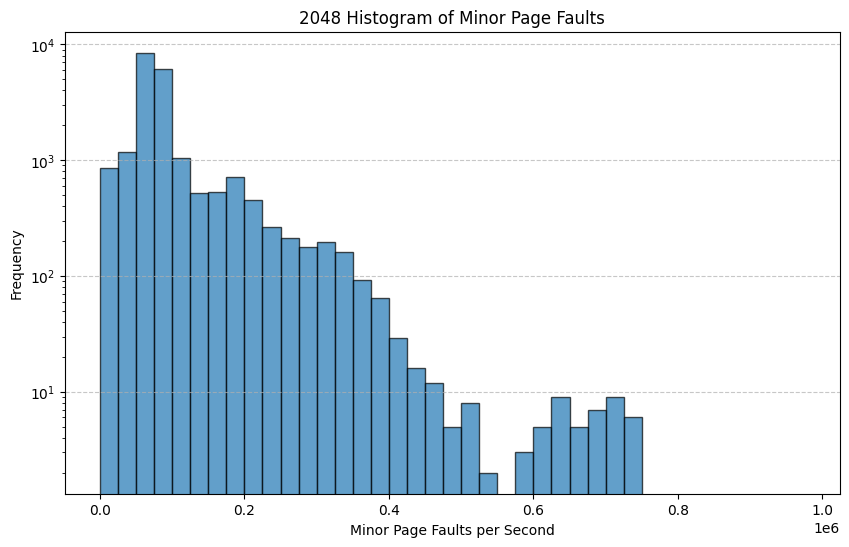

In [9]:
# Calculate the average minor page fault
average_minflt_s = df['minflt/s'].mean()
median_minflt_s = df['minflt/s'].median()
print(f"Average minor page fault: {average_minflt_s}")
print(f"Average minor page fault: {median_minflt_s}")


plt.figure(figsize=(10, 6))
# Normalize y-axis
# plt.ylim(0, 20000)
plt.yscale('log')
plt.hist(df['minflt/s'], bins=range(0, 1000000, 25000), edgecolor='black', alpha=0.7)
plt.xlabel('Minor Page Faults per Second')
plt.ylabel('Frequency')
plt.title('2048 Histogram of Minor Page Faults')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Average major page fault: 1892.0327457643118
Average major page fault: 8.0


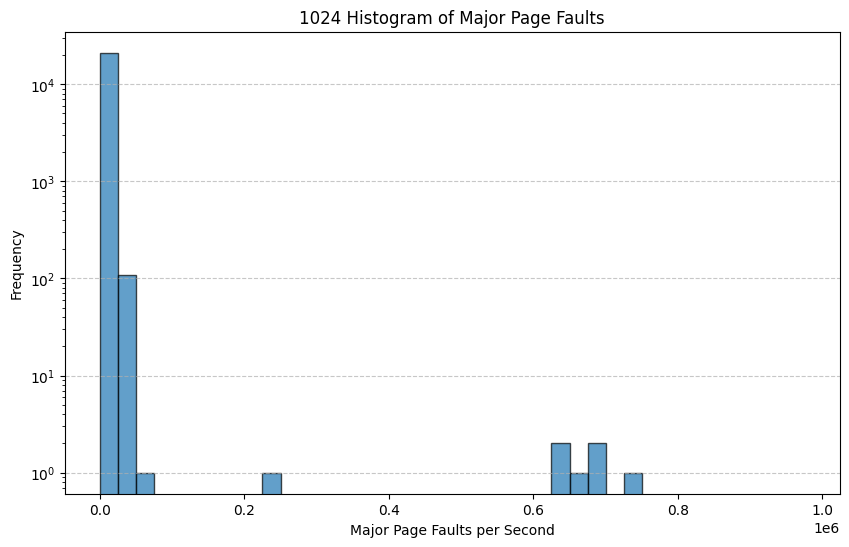

In [10]:
# Calculate the average minor page fault
average_minflt_s = df['majflt/s'].mean()
median_minflt_s = df['majflt/s'].median()
print(f"Average major page fault: {average_minflt_s}")
print(f"Average major page fault: {median_minflt_s}")


plt.figure(figsize=(10, 6))
# Normalize y-axis
# plt.ylim(0, 20000)
plt.yscale('log')
plt.hist(df['majflt/s'], bins=range(0, 1000000, 25000), edgecolor='black', alpha=0.7)
plt.xlabel('Major Page Faults per Second')
plt.ylabel('Frequency')
plt.title('1024 Histogram of Major Page Faults')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()